In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

seed = 42
np.random.seed(seed)


In [2]:
import numpy as np

def flip_coin(p, n, verbose=False, seed=None, interpret=False):
    """
    Simulate flipping a coin n times with probability p of getting Heads.
    Args:
        p (float): Probability of getting Heads.
        n (int): Number of flips.
        verbose (bool): If True, print detailed results.
    """
    # Generate n coin flips using a binomial distribution,
    # where a flip returns 1 (Head) with probability p and 0 (Tail) otherwise.
    flip_results = np.random.binomial(1, p, n)

    # If interpret is True, convert the results to "Head" or "Tail"
    if interpret:
        results = ["Head" if flip == 1 else "Tail" for flip in flip_results]

        results = np.array(results)
        # Count the number of Heads and Tails
        head_count = np.sum(results == "Head")
        tail_count = np.sum(results == "Tail")
    else:
        results = flip_results
        # Count the number of Heads and Tails
        head_count = np.sum(results == 1)
        tail_count = np.sum(results == 0)
        
    # Calculate the probability of getting Heads and Tails
    head_prob = head_count / n
    tail_prob = tail_count / n
    # Calculate the expected number of Heads and Tails
    expected_heads = n * p
    expected_tails = n * (1 - p)
    # Calculate the variance of the number of Heads and Tails
    head_variance = n * p * (1 - p)
    tail_variance = n * (1 - p) * p
    # Calculate the standard deviation of the number of Heads and Tails
    head_stddev = np.sqrt(head_variance)
    tail_stddev = np.sqrt(tail_variance)
    # Calculate the confidence interval for the number of Heads and Tails
    z_score = 1.96  # for 95% confidence level
    head_ci_lower = head_count - z_score * head_stddev
    head_ci_upper = head_count + z_score * head_stddev
    tail_ci_lower = tail_count - z_score * tail_stddev
    tail_ci_upper = tail_count + z_score * tail_stddev
    if verbose:
        # Print the results
        print(f"Number of Heads: {head_count}, Real%: {head_prob:.5f}")
        print(f"Number of Tails: {tail_count}, Real%: {tail_prob:.5f}")

        print(f"\nExpected number of Heads: {expected_heads:.2f}")
        print(f"Expected number of Tails: {expected_tails:.2f}")

        print(f"\nVariance of Heads: {head_variance:.2f}")
        print(f"Variance of Tails: {tail_variance:.2f}")

        print(f"\nStandard deviation of Heads: {head_stddev:.5f}")
        print(f"Standard deviation of Tails: {tail_stddev:.5f}")

        print(f"\n95% confidence interval for Heads: ({head_ci_lower:.2f}, {head_ci_upper:.2f})")
        print(f"95% confidence interval for Tails: ({tail_ci_lower:.2f}, {tail_ci_upper:.2f})")

    return results


In [3]:
# flip coins with k trials, each with n flips
def k_trials_flip(k, n, p=0.5, verbose=False, seed=None):
    """
    Simulate flipping a coin k times with probability p of getting Heads.
    Args:
        k (int): Number of trials.
        n (int): Number of flips per trial.
        p (float): Probability of getting Heads.
        verbose (bool): If True, print detailed results.
    """
    # Set the random seed for reproducibility
    if seed is not None:
        np.random.seed(seed)

    # Generate k trials of n coin flips each
    results = np.array([flip_coin(p, n) for _ in range(k)])

    if verbose:
        print(f"Results of {k} trials with {n} flips each:")
        print(results)

    return results

# Run Simulation

In [4]:
k_trials_results = k_trials_flip(700_000, 250, p=0.5, verbose=False, seed=42)

# print all the trials that has more than 8 heads in the first 10 flips
selected_trials = k_trials_results[np.sum(k_trials_results[:, :10], axis=1) >= 8]
print("Number of trials with >= 8 heads in the first 10 flips:", len(selected_trials))
print(selected_trials)


Number of trials with >= 8 heads in the first 10 flips: 38143
[[1 1 0 ... 1 1 1]
 [1 1 1 ... 0 1 0]
 [1 1 1 ... 1 1 1]
 ...
 [1 1 1 ... 1 1 1]
 [1 1 0 ... 0 0 1]
 [1 1 0 ... 1 0 0]]


## All trials

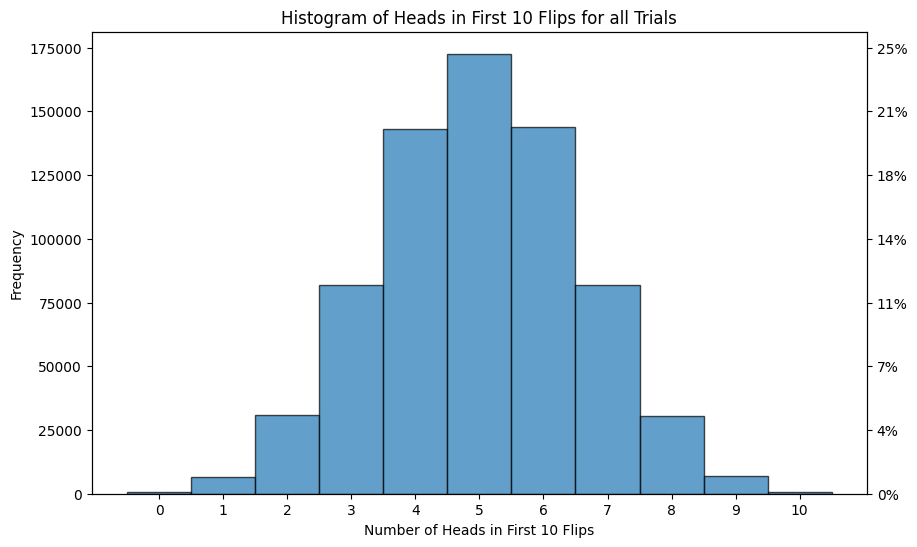

,Heads,Counts,Percentage
0,0,697,0.099571
1,1,6702,0.957429
2,2,30842,4.406000
3,3,81959,11.708429
4,4,143256,20.465143
5,5,172600,24.657143
6,6,143792,20.541714
7,7,82009,11.715571
8,8,30588,4.369714
9,9,6852,0.978857


In [5]:
# Calculate the number of heads in the first 10 flips for each trial
heads_first10 = np.sum(k_trials_results[:, :10], axis=1)
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

fig, ax = plt.subplots(figsize=(10, 6))
n, bins, patches = ax.hist(heads_first10, bins=np.arange(-0.5, 11, 1), alpha=0.7, edgecolor='black')
ax.set_xlabel('Number of Heads in First 10 Flips')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Heads in First 10 Flips for all Trials')
ax.set_xticks(range(0, 11))

# Create secondary y-axis for percentage scale
total = len(heads_first10)
ax_r = ax.twinx()
ax_r.set_ylim(ax.get_ylim())
ax_r.yaxis.set_major_formatter(PercentFormatter(total, decimals=0))

plt.show()

unique_values, counts_values = np.unique(heads_first10, return_counts=True)
df_ori = pd.DataFrame({'Heads': unique_values, 'Counts': counts_values})
df_ori['Percentage'] = df_ori['Counts'] / len(heads_first10) * 100
df_ori

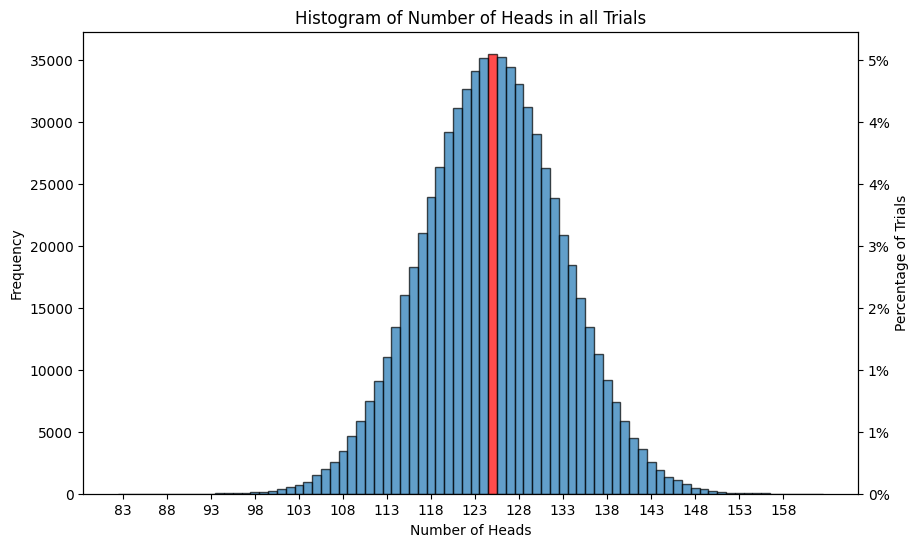

,Heads,Counts,Percentage
37,125,35470,5.067143
38,126,35234,5.033429
36,124,35137,5.019571
39,127,34367,4.909571
35,123,34103,4.871857
...,...,...,...
1,89,2,0.000286
2,90,1,0.000143
72,160,1,0.000143
73,161,1,0.000143


In [6]:
# Count the number of heads in each selected trial
heads_counts = np.sum(k_trials_results, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

bins_fixed = np.arange(min(heads_counts)-0.5, max(heads_counts)+1, 1)
counts, bins_fixed, patches = ax.hist(heads_counts, bins=bins_fixed, alpha=0.7, edgecolor='black')

# Change the color of the bar with the highest value
max_index = np.argmax(counts)
patches[max_index].set_facecolor('red')

# Compute ticks from the minimum to maximum number of heads, stepping by 5
tick_min = int(np.min(heads_counts))
tick_max = int(np.max(heads_counts))
ticks = np.arange(tick_min, tick_max + 1, 5)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

ax.set_xlabel('Number of Heads')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Number of Heads in all Trials')

# Create twin y-axis for percentage scale using total_trials for normalization
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
total_trials = len(heads_counts)
ax2.yaxis.set_major_formatter(PercentFormatter(total_trials, decimals=0))
ax2.set_ylabel('Percentage of Trials')

plt.show()


# Count the occurrences of each number of heads
unique_values, counts_values = np.unique(heads_counts, return_counts=True)
df_counts = pd.DataFrame({'Heads': unique_values, 'Counts': counts_values})
df_counts['Percentage'] = df_counts['Counts'] / len(heads_counts) * 100
df_counts.sort_values(by='Counts', inplace=True, ascending=False)
df_counts


In [7]:
exp_heads = np.mean(heads_counts)
print(f"Expected number of heads: {exp_heads:.4f}")

# Calculate the variance
var_heads = np.var(heads_counts)
print(f"Variance of number of heads: {var_heads:.4f}")
# Calculate the standard deviation
std_heads = np.std(heads_counts)
print(f"Standard deviation of number of heads: {std_heads:.4f}")
# Calculate the 95% confidence interval
z_score = 1.96  # for 95% confidence level
ci_lower = exp_heads - z_score * std_heads
ci_upper = exp_heads + z_score * std_heads
print(f"95% confidence interval for number of heads: ({ci_lower:.4f}, {ci_upper:.4f})")




Expected number of heads: 124.9968
Variance of number of heads: 62.4472
Standard deviation of number of heads: 7.9024
95% confidence interval for number of heads: (109.5082, 140.4854)


## Subsetting trials with >= 8 heads in first 10 flips

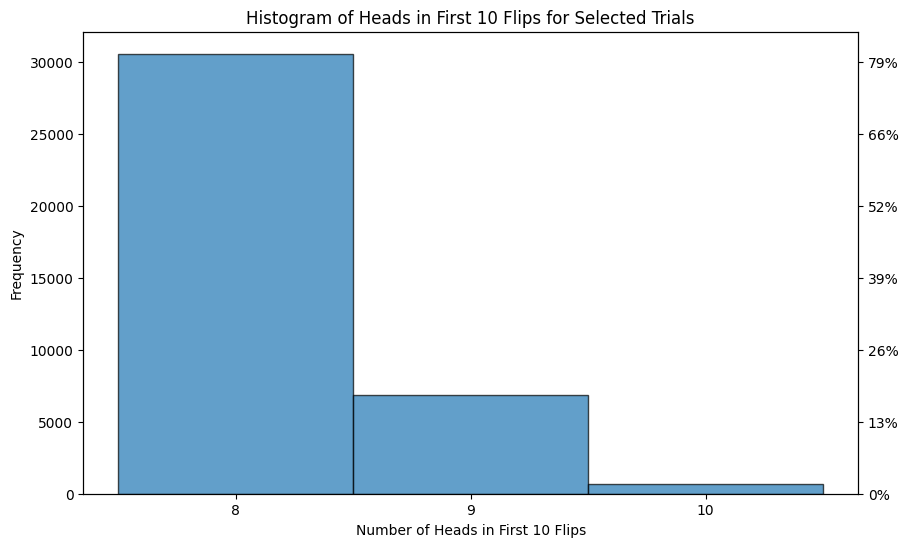

Number of trials with >= 8 heads in the first 10 flips: 38143


,Heads,Counts,Percentage
0,8,30588,80.192958
1,9,6852,17.963978
2,10,703,1.843064


In [8]:
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

# Count the number of heads in the first 10 flips for each selected trial
heads_first10 = np.sum(selected_trials[:, :10], axis=1)

fig, ax1 = plt.subplots(figsize=(10, 6))

# Using bins from 8 to 11 because selected trials have >=8 heads in the first 10 flips
n, bins, patches = ax1.hist(heads_first10, bins=range(8, 12), align='left', alpha=0.7, edgecolor='black')
ax1.set_xlabel('Number of Heads in First 10 Flips')
ax1.set_ylabel('Frequency')
ax1.set_title('Histogram of Heads in First 10 Flips for Selected Trials')
ax1.set_xticks(range(8, 11))

# Create a twin y-axis and format it to display percentages
ax2 = ax1.twinx()
total_trials = len(heads_first10)
ax2.set_ylim(ax1.get_ylim())
ax2.yaxis.set_major_formatter(PercentFormatter(total_trials, decimals=0))

plt.show()

print("Number of trials with >= 8 heads in the first 10 flips:", len(selected_trials))
# Count the occurrences of each number of heads
unique_values, counts_values = np.unique(heads_first10, return_counts=True)
df_selected = pd.DataFrame({'Heads': unique_values, 'Counts': counts_values})
df_selected['Percentage'] = df_selected['Counts'] / len(heads_first10) * 100
df_selected

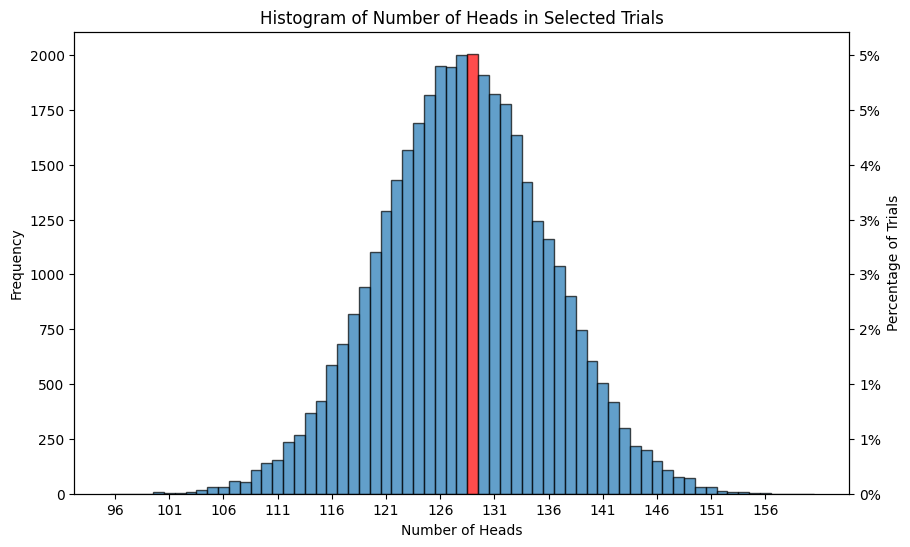

,Heads,Counts,Percentage
31,129,2006,5.259156
30,128,2001,5.246048
28,126,1948,5.107097
29,127,1947,5.104475
32,130,1908,5.002228
33,131,1824,4.782005
27,125,1819,4.768896
34,132,1776,4.656162
26,124,1690,4.430695
35,133,1636,4.289123


In [9]:
# Count the number of heads in each selected trial
heads_counts = np.sum(selected_trials, axis=1)

fig, ax = plt.subplots(figsize=(10, 6))

bins_fixed = np.arange(min(heads_counts)-0.5, max(heads_counts)+1, 1)
counts, bins_fixed, patches = ax.hist(heads_counts, bins=bins_fixed, alpha=0.7, edgecolor='black')

# Change the color of the bar with the highest value
max_index = np.argmax(counts)
patches[max_index].set_facecolor('red')

# Compute ticks from the minimum to maximum number of heads, stepping by 5
tick_min = int(np.min(heads_counts))
tick_max = int(np.max(heads_counts))
ticks = np.arange(tick_min, tick_max + 1, 5)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

ax.set_xlabel('Number of Heads')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Number of Heads in Selected Trials')

# Create twin y-axis for percentage scale using total_trials for normalization
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
total_trials = len(heads_counts)
ax2.yaxis.set_major_formatter(PercentFormatter(total_trials, decimals=0))
ax2.set_ylabel('Percentage of Trials')

plt.show()


# Count the occurrences of each number of heads
unique_values, counts_values = np.unique(heads_counts, return_counts=True)
df_counts = pd.DataFrame({'Heads': unique_values, 'Counts': counts_values})
df_counts['Percentage'] = df_counts['Counts'] / len(heads_counts) * 100
df_counts.sort_values(by='Counts', inplace=True, ascending=False)
df_counts.head(10)


In [10]:
df_counts.to_csv('selected_trials.csv', index=False)  

In [11]:
exp_heads = np.mean(heads_counts)
print(f"Expected number of heads: {exp_heads:.4f}")

# Calculate the variance
var_heads = np.var(heads_counts)
print(f"Variance of number of heads: {var_heads:.4f}")
# Calculate the standard deviation
std_heads = np.std(heads_counts)
print(f"Standard deviation of number of heads: {std_heads:.4f}")
# Calculate the 95% confidence interval
z_score = 1.96  # for 95% confidence level
ci_lower = exp_heads - z_score * std_heads
ci_upper = exp_heads + z_score * std_heads
print(f"95% confidence interval for number of heads: ({ci_lower:.4f}, {ci_upper:.4f})")




Expected number of heads: 128.1886
Variance of number of heads: 59.9216
Standard deviation of number of heads: 7.7409
95% confidence interval for number of heads: (113.0164, 143.3608)


# Random walk

First zero crossing after observation 50 at step: 106
First maximum value before zero crossing: 19 at step: 55
Number of maxima before zero crossing: 2
Maxima positions before zero crossing: [55 61]


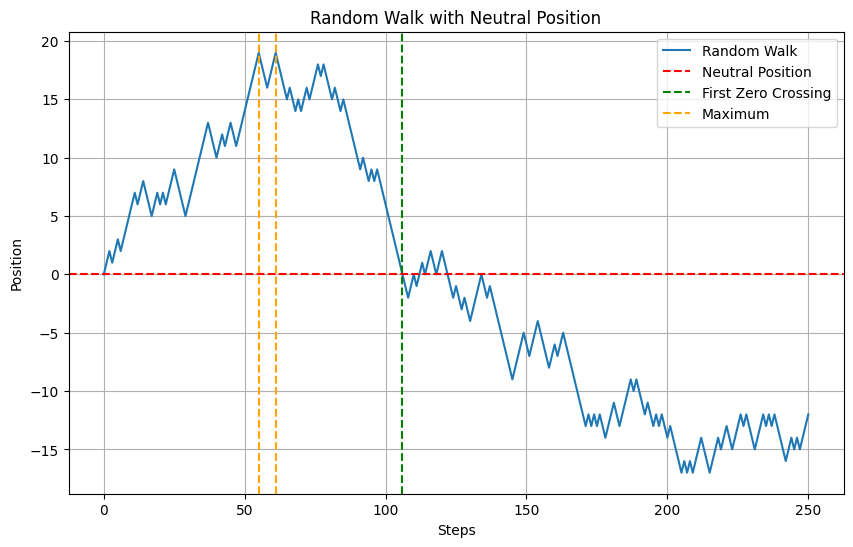

In [12]:
def get_neutral_position(trial, after_j=0, verbose=False, plot=False):
    """
    Get the neutral position of a random walk.
    Args:
        trial (array): The trial data.
        after_j (int): Begin searching for the zero crossing after this many observations.
    Returns:
        tuple: (first_zero_crossing, first_max, first_max_position)
    """
    steps_trial = np.where(trial == 1, 1, -1)
    positions_trial = np.cumsum(steps_trial)
    positions_trial = np.insert(positions_trial, 0, 0)  # Insert the starting position (0)

    try:
        # Find indices where the walk is at neutral position
        zero_indices = np.where(positions_trial == 0)[0]
        if after_j == 0:
            # exclude the starting position
            valid_zero = zero_indices[zero_indices > 0]
        else:
            valid_zero = zero_indices[zero_indices >= after_j]
        if valid_zero.size == 0:
            raise IndexError("No zero crossing found after index %d" % after_j)
        first_zero_crossing = valid_zero[0]

        # Find the maximum between the start and the first zero crossing.
        max_val = np.max(positions_trial[:first_zero_crossing])
        max_indices = np.where(positions_trial[:first_zero_crossing] == max_val)[0]
        first_max = max_val
        first_max_position = max_indices[0] if len(max_indices) > 0 else None
        
        if verbose:
            print(f"First zero crossing after observation {after_j} at step: {first_zero_crossing}")
            print(f"First maximum value before zero crossing: {first_max} at step: {first_max_position}")
            print(f"Number of maxima before zero crossing: {len(max_indices)}")
            print(f"Maxima positions before zero crossing: {max_indices}")

    except IndexError:
        max_val = np.max(positions_trial)
        max_indices = np.where(positions_trial == max_val)[0]
        first_zero_crossing = None
        first_max = max_val
        first_max_position = max_indices[0] if len(max_indices) > 0 else None
        if verbose:
            print("No zero crossing found after the given observations.")
            print(f"First maximum value: {first_max} at step: {first_max_position}")
            print(f"Number of maxima: {len(max_indices)}")
            print(f"Maxima positions: {max_indices}")

    if plot:
        plt.figure(figsize=(10, 6))
        plt.plot(positions_trial, label='Random Walk')
        plt.axhline(0, color='red', linestyle='--', label='Neutral Position')
        if first_zero_crossing is not None:
            plt.axvline(first_zero_crossing, color='green', linestyle='--', label='First Zero Crossing')
        for idx in max_indices:
            plt.axvline(idx, color='orange', linestyle='--', label='Maximum' if idx == max_indices[0] else None)
        plt.title('Random Walk with Neutral Position')
        plt.xlabel('Steps')
        plt.ylabel('Position')
        plt.legend()
        plt.grid(True)
        plt.show()
        
    return first_zero_crossing, first_max, first_max_position

# Example: Get the neutral position for the first selected trial after 50 observations
neutral_position = get_neutral_position(selected_trials[0], after_j=50, verbose=True, plot=True)


In [13]:
# Apply get_neutral_position to each selected trial without plotting or verbose output
results = [get_neutral_position(trial, after_j=10, verbose=False, plot=False) for trial in selected_trials]

# Convert results to a DataFrame for easy inspection
results_df = pd.DataFrame(results, columns=['first_zero_crossing', 'first_max', 'first_max_position'])
results_df.head()

,first_zero_crossing,first_max,first_max_position
0,106.0,19,55
1,22.0,7,11
2,50.0,9,11
3,NaN,39,239
4,NaN,34,172


Number of zero crossings: 25916
Percentage of zero crossings: 67.94431481530032

Number of non-zero crossings: 12227
Percentage of non-zero crossings: 32.05568518469968


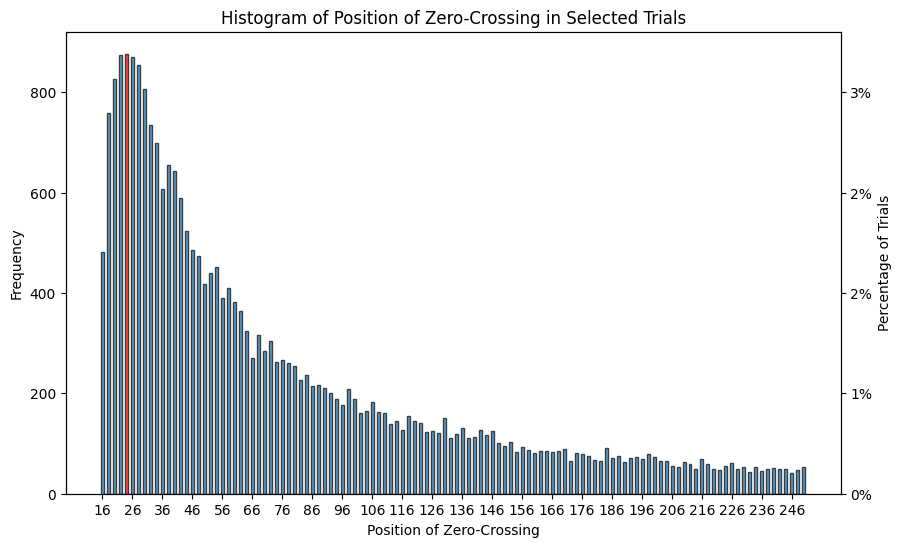

,first_zero_position,Counts,Percentage
4,24,877,3.384010
3,22,875,3.376293
5,26,870,3.357000
6,28,854,3.295262
2,20,826,3.187220
...,...,...,...
116,248,48,0.185214
103,222,47,0.181355
110,236,45,0.173638
108,232,44,0.169779


In [14]:
# Count the number of heads in each selected trial
print("Number of zero crossings:", results_df['first_zero_crossing'].notna().sum())
print("Percentage of zero crossings:", results_df['first_zero_crossing'].notna().sum() / len(results_df) * 100)
print("")
print("Number of non-zero crossings:", results_df['first_zero_crossing'].isna().sum())
print("Percentage of non-zero crossings:", results_df['first_zero_crossing'].isna().sum() / len(results_df) * 100)

first_zero = results_df['first_zero_crossing'].dropna().astype(int)

fig, ax = plt.subplots(figsize=(10, 6))

bins_fixed = np.arange(min(first_zero)-0.5, max(first_zero)+1, 1)
counts, bins_fixed, patches = ax.hist(first_zero, bins=bins_fixed, alpha=0.7, edgecolor='black')

# Change the color of the bar with the highest value
max_index = np.argmax(counts)
patches[max_index].set_facecolor('red')

# Compute ticks from the minimum to maximum number of heads, stepping by 10
tick_min = int(np.min(first_zero))
tick_max = int(np.max(first_zero))
ticks = np.arange(tick_min, tick_max + 1, 10)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

ax.set_xlabel('Position of Zero-Crossing')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Position of Zero-Crossing in Selected Trials')

# Create twin y-axis for percentage scale using total_trials for normalization
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
total_trials = len(first_zero)
ax2.yaxis.set_major_formatter(PercentFormatter(total_trials, decimals=0))
ax2.set_ylabel('Percentage of Trials')

plt.show()


# Count the occurrences of each number of heads
unique_values, counts_values = np.unique(first_zero, return_counts=True)
df_counts = pd.DataFrame({'first_zero_position': unique_values, 'Counts': counts_values})
df_counts['Percentage'] = df_counts['Counts'] / len(first_zero) * 100
df_counts.sort_values(by='Counts', inplace=True, ascending=False)
df_counts



In [15]:
df_counts.sort_values(by='first_zero_position', inplace=True, ascending=True)
df_counts


,first_zero_position,Counts,Percentage
0,16,482,1.859855
1,18,759,2.928693
2,20,826,3.187220
3,22,875,3.376293
4,24,877,3.384010
...,...,...,...
113,242,50,0.192931
114,244,49,0.189072
115,246,41,0.158203
116,248,48,0.185214


In [16]:
df_counts.to_csv('first_zero_crossing.csv', index=False)

In [17]:
exp_value = np.sum(df_counts['first_zero_position'] * df_counts['Counts']) / len(first_zero)
print("Expected value of the first-crossing-position:", exp_value)

# Calculate the variance
variance = np.sum(df_counts['Counts'] * (df_counts['first_zero_position'] - exp_value) ** 2) / len(first_zero)
print("Variance of the first-crossing-position:", variance)

# Calculate the standard deviation
std_dev = np.sqrt(variance)
print("Standard deviation of the first-crossing-position:", std_dev)
# Calculate the confidence interval
z_score = 1.96  # for 95% confidence level
ci_lower = exp_value - z_score * std_dev
ci_upper = exp_value + z_score * std_dev
print(f"95% confidence interval for the expected value: ({ci_lower:.2f}, {ci_upper:.2f})")



Expected value of the first-crossing-position: 75.47646241703967
Variance of the first-crossing-position: 3287.6610835805836
Standard deviation of the first-crossing-position: 57.33812940426801
95% confidence interval for the expected value: (-36.91, 187.86)


# observation: the spaces in the plot above is not a bug, it's a feature



first-zero-position after 10 can only be an even number such as 16, 18, etc.

why? see PDF file

## Try random walk with longer horizon: n=500

increase number of flips per trial will result in more zero crossing



In [18]:
# to prevent running the code in the next cell
raise ValueError("Stop here")

ValueError: Stop here

Number of zero crossings: 29420
Percentage of zero crossings: 77.18948417904183

Number of non-zero crossings: 8694
Percentage of non-zero crossings: 22.810515820958177


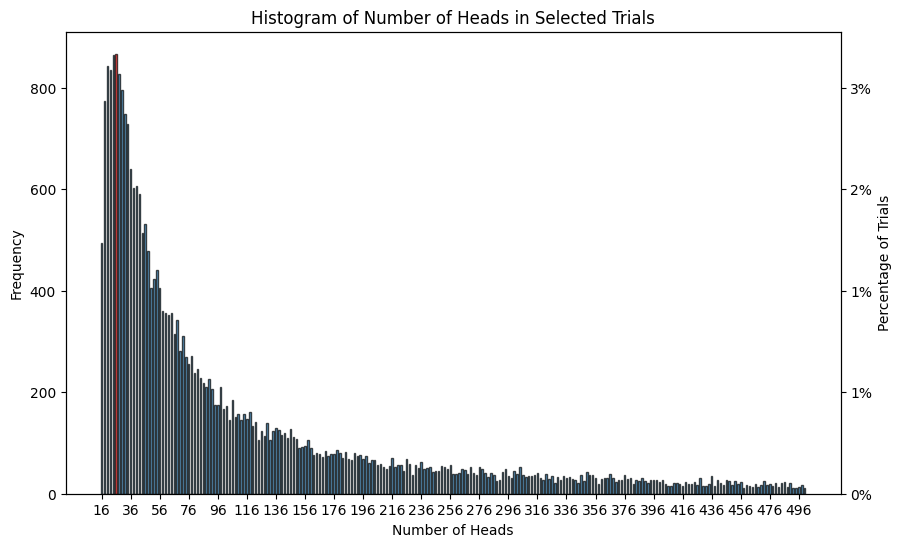

,first_zero_position,Counts,Percentage
5,26,867,2.946975
4,24,864,2.936778
2,20,843,2.865398
3,22,835,2.838205
6,28,828,2.814412
...,...,...,...
226,468,13,0.044188
239,494,12,0.040789
221,458,12,0.040789
242,500,12,0.040789


In [ ]:
# Count the number of heads in each selected trial
print("Number of zero crossings:", results_df['first_zero_crossing'].notna().sum())
print("Percentage of zero crossings:", results_df['first_zero_crossing'].notna().sum() / len(results_df) * 100)
print("")
print("Number of non-zero crossings:", results_df['first_zero_crossing'].isna().sum())
print("Percentage of non-zero crossings:", results_df['first_zero_crossing'].isna().sum() / len(results_df) * 100)


first_zero = results_df['first_zero_crossing'].dropna().astype(int)

fig, ax = plt.subplots(figsize=(10, 6))

bins_fixed = np.arange(min(first_zero)-0.5, max(first_zero)+1, 1)
counts, bins_fixed, patches = ax.hist(first_zero, bins=bins_fixed, alpha=0.7, edgecolor='black')

# Change the color of the bar with the highest value
max_index = np.argmax(counts)
patches[max_index].set_facecolor('red')

# Compute ticks from the minimum to maximum number of heads, stepping by 10
tick_min = int(np.min(first_zero))
tick_max = int(np.max(first_zero))
ticks = np.arange(tick_min, tick_max + 1, 20)
ax.set_xticks(ticks)
ax.set_xticklabels(ticks)

ax.set_xlabel('Number of Heads')
ax.set_ylabel('Frequency')
ax.set_title('Histogram of Number of Heads in Selected Trials')

# Create twin y-axis for percentage scale using total_trials for normalization
ax2 = ax.twinx()
ax2.set_ylim(ax.get_ylim())
total_trials = len(first_zero)
ax2.yaxis.set_major_formatter(PercentFormatter(total_trials, decimals=0))
ax2.set_ylabel('Percentage of Trials')

plt.show()


# Count the occurrences of each number of heads
unique_values, counts_values = np.unique(first_zero, return_counts=True)
df_counts = pd.DataFrame({'first_zero_position': unique_values, 'Counts': counts_values})
df_counts['Percentage'] = df_counts['Counts'] / len(first_zero) * 100
df_counts.sort_values(by='Counts', inplace=True, ascending=False)
df_counts



In [ ]:
df_counts.sort_values(by='first_zero_position', inplace=True, ascending=True)
df_counts


,first_zero_position,Counts,Percentage
0,16,495,1.682529
1,18,773,2.627464
2,20,843,2.865398
3,22,835,2.838205
4,24,864,2.936778
...,...,...,...
238,492,11,0.037390
239,494,12,0.040789
240,496,14,0.047587
241,498,18,0.061183
